In [1]:
library(readxl) ## Leer excel
library(tidyverse) ## Manipular base de datos
library(igraph) ## Grafos
library(expm) 
library(writexl)
library(ggraph)
library(tidygraph)  # para manipular grafos estilo tidy

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Adjuntando el paquete: 'igraph'


The following objects are masked from 'package:lubridate':

    %--%, union


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following objects are masked from 'package:purrr':

    compose, simplify


The following object is masked from 'package:tidyr':

    crossing


The following object is masked from 'package:tibble':

    as_data_frame


The following objects are masked from 'package:s

In [2]:
# Lee un archivo Excel ubicado en la ruta especificada
matriz <- read_excel(
    "C:/Users/cfutr/OneDrive/Escritorio/CICS/2025/Tesis/Objetivos de Aprendizaje/Modelo/datos/Raw_Data/Matriz_de_Adyacencia_Pensiones_validada.xlsx", col_names=FALSE)

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`
• `` -> `...18`
• `` -> `...19`
• `` -> `...20`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
• `` -> `...24`
• `` -> `...25`
• `` -> `...26`
• `` -> `...27`
• `` -> `...28`
• `` -> `...29`
• `` -> `...30`
• `` -> `...31`
• `` -> `...32`
• `` -> `...33`
• `` -> `...34`
• `` -> `...35`
• `` -> `...36`
• `` -> `...37`
• `` -> `...38`
• `` -> `...39`
• `` -> `...40`
• `` -> `...41`
• `` -> `...42`
• `` -> `...43`
• `` -> `...44`
• `` -> `...45`
• `` -> `...46`
• `` -> `...47`
• `` -> `...48`
• `` -> `...49`
• `` -> `...50`
• `` -> `...51`
• `` -> `...52`
• `` -> `...53`
• `` -> `...54`
• `` -> `...55`
• `` -> `...56`
• `` -> `...57`
• `` -> `...58`
• `` -> `...59`
• `` -> `...60`
• `` -> `...61`
• `` -> `...62`
• `` -

In [3]:
matriz<-matriz%>% select(-1)%>%slice(-1)%>% #borra la primera fila y la primera columna
set_names(as.character(unlist(slice(., 1))))%>%
slice(-1) #hace la primera fila los nombres de las columnas y borra la primera fila

In [4]:
# Toma el data frame `matriz` y lo transforma en una matriz de adyacencia numérica.

matriz_adj<-matriz%>%
  column_to_rownames(var = colnames(.)[1])%>% #Convierte la primera columna (por ejemplo, "Concepto") en los nombres de las filas.                         
  mutate(across(everything(), as.numeric)) %>%  #Aplica `as.numeric()` a todas las columnas del data frame.
  as.matrix() #Convierte el data frame limpio en una matriz

  matriz_adj[is.na(matriz_adj)] <- 0 # Reemplaza los valores NA por 0 en la matriz de adyacencia
  

In [5]:
g <- graph_from_adjacency_matrix(matriz_adj, mode = "directed")

In [6]:
# Convertimos a data.frame las aristas
aristas <- as_data_frame(g, what = "edges")

# Generamos un identificador de cada par como "A--B" ordenado alfabéticamente
aristas$pair_id <- apply(aristas[, c("from", "to")], 1, function(x) paste(sort(x), collapse = "--"))

# Contamos cuántas veces aparece cada par (si es 2, hay doble dirección)
dobles <- aristas %>%
  group_by(pair_id) %>%
  filter(n() == 2) %>%
  ungroup()%>%
  distinct(pair_id)
  
# Resultado: lista de aristas que forman relaciones bidireccionales
dobles

pair_id
<chr>
Condiciones_Especiales_RV--Definicion_SCOMP
Definicion_SCOMP--Periodo_Garantizado
Clausula_Incremento_Sobrevivencia--Definicion_SCOMP
Aumento_Temporal--Definicion_SCOMP
Pension_Sobrevivencia--Renta_Vitalicia


In [7]:
matriz_adj["Definicion_SCOMP","Condiciones_Especiales_RV" ] <- 0
matriz_adj["Definicion_SCOMP", "Periodo_Garantizado"] <- 0
matriz_adj["Definicion_SCOMP", "Clausula_Incremento_Sobrevivencia"] <- 0
matriz_adj["Definicion_SCOMP", "Aumento_Temporal"] <- 0
matriz_adj["Renta_Vitalicia", "Pension_Sobrevivencia"] <- 0

In [8]:
# Crea un grafo dirigido (objeto de clase `igraph`) a partir de la matriz de adyacencia `matriz_adj`.

g <- graph_from_adjacency_matrix(matriz_adj, mode = "directed")

In [9]:
# Convertimos a data.frame las aristas
aristas <- as_data_frame(g, what = "edges")

# Generamos un identificador de cada par como "A--B" ordenado alfabéticamente
aristas$pair_id <- apply(aristas[, c("from", "to")], 1, function(x) paste(sort(x), collapse = "--"))

# Contamos cuántas veces aparece cada par (si es 2, hay doble dirección)
dobles <- aristas %>%
  group_by(pair_id) %>%
  filter(n() == 2) %>%
  ungroup()%>%
  distinct(pair_id)
  
# Resultado: lista de aristas que forman relaciones bidireccionales
dobles

pair_id
<chr>


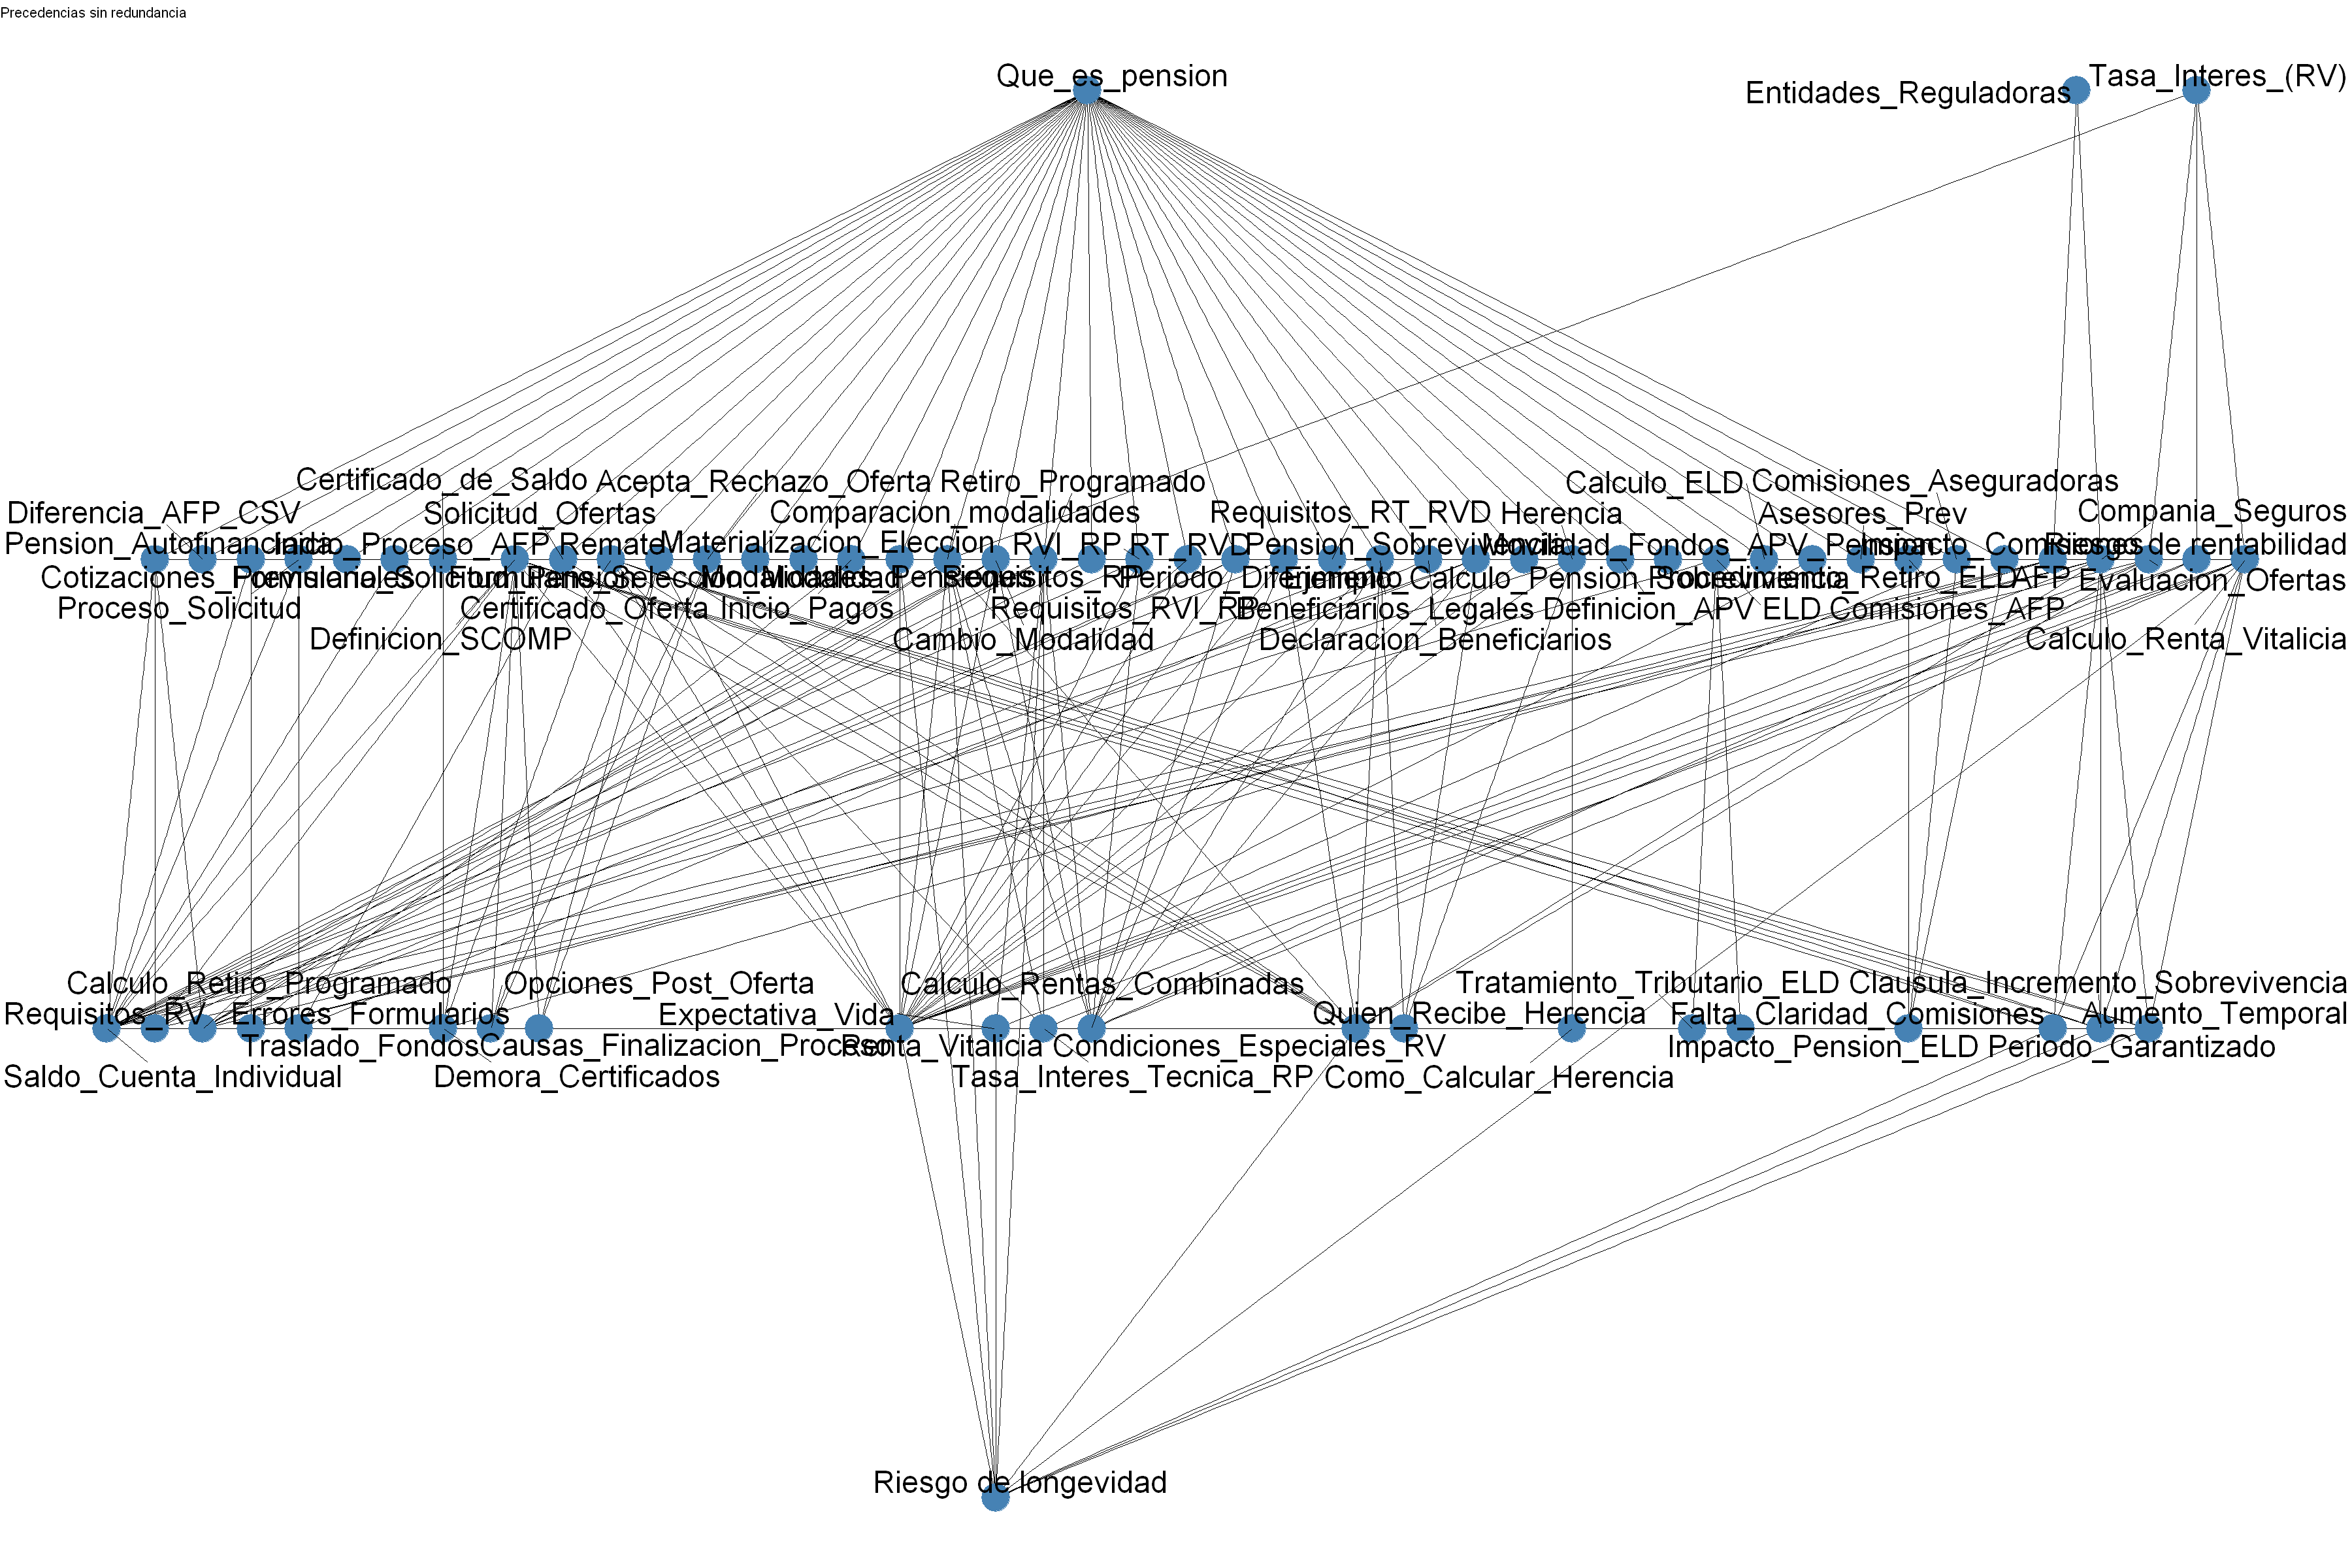

In [10]:
options(repr.plot.width = 30, repr.plot.height = 20)
# Convertir tu grafo igraph a tidygraph
grafo_tidy <- as_tbl_graph(g)

# Visualizar
ggraph(grafo_tidy, layout = "tree") +
  geom_edge_link(arrow = arrow(length = unit(1, 'mm')), end_cap = circle(2.5, 'mm')) +
  geom_node_point(size = 12, color = "steelblue") +
  geom_node_text(aes(label = name), repel = TRUE, size = 10, max.overlaps = Inf) +
  theme_void() +
  ggtitle("Precedencias sin redundancia")

In [24]:
# 🧭 Nodo objetivo
nodo_objetivo <- "Condiciones_Especiales_RV"

# 🎯 Predecesores que pueden llegar al nodo objetivo
predecesores <- V(g)[subcomponent(g, nodo_objetivo, mode = "in")]$name
predecesores <- setdiff(predecesores, nodo_objetivo)

# Almacenar resultados
resultados <- list()

cat(sprintf("⏳ Buscando caminos hacia: %s\n", nodo_objetivo))

for (p in predecesores) {
  # 🟢 Camino más corto (rápido)
  path_corto <- shortest_paths(g, from = p, to = nodo_objetivo, mode = "out")$vpath[[1]]
  nombres_corto <- V(g)$name[path_corto]
  largo_corto <- length(nombres_corto)
  # 🔴 Camino más largo: hacemos DFS y elegimos el más largo
  # Encontrar todos los caminos simples desde p hasta el nodo objetivo
  caminos_simples <- suppressWarnings(all_simple_paths(g, from = p, to = nodo_objetivo, mode = "out"))
  if (length(caminos_simples) > 0) {
    # Seleccionar el camino más largo
    longitudes <- sapply(caminos_simples, length)
    idx_max <- which.max(longitudes)
    path_largo <- caminos_simples[[idx_max]]
    nombres_largo <- V(g)$name[path_largo]
    largo_largo <- length(nombres_largo)
  } else {
    nombres_largo <- character(0)
    largo_largo <- 0
  }
  resultados[[p]] <- data.frame(
    Desde = p,
    Camino_Mas_Corto = paste(nombres_corto, collapse = " → "),
    Largo_Corto = largo_corto,
    Camino_Mas_Largo = paste(nombres_largo, collapse = " → "),
    Largo_Largo = largo_largo,
    stringsAsFactors = FALSE
  )
  }


  
  

⏳ Buscando caminos hacia: Condiciones_Especiales_RV


In [25]:
resultados

Desde,Camino_Mas_Corto,Largo_Corto,Camino_Mas_Largo,Largo_Largo
<chr>,<chr>,<int>,<chr>,<int>
Compania_Seguros,Compania_Seguros → Condiciones_Especiales_RV,2,Compania_Seguros → Renta_Vitalicia → Expectativa_Vida → Riesgo de longevidad → Retiro_Programado → Tasa_Interes_Tecnica_RP → Riesgo de rentabilidad → AFP → Cotizaciones_Previsionales → Saldo_Cuenta_Individual → Pension_Sobrevivencia → Beneficiarios_Legales → Condiciones_Especiales_RV,13
Desde,Camino_Mas_Corto,Largo_Corto,Camino_Mas_Largo,Largo_Largo
<chr>,<chr>,<int>,<chr>,<int>
Riesgo de longevidad,Riesgo de longevidad → Condiciones_Especiales_RV,2,Riesgo de longevidad → Modalidades_Pensiones → Renta_Vitalicia → Tasa_Interes_Tecnica_RP → Riesgo de rentabilidad → AFP → Cotizaciones_Previsionales → Saldo_Cuenta_Individual → Retiro_Programado → Pension_Sobrevivencia → Beneficiarios_Legales → Condiciones_Especiales_RV,12
Desde,Camino_Mas_Corto,Largo_Corto,Camino_Mas_Largo,Largo_Largo
<chr>,<chr>,<int>,<chr>,<int>
Renta_Vitalicia,Renta_Vitalicia → Condiciones_Especiales_RV,2,Renta_Vitalicia → Expectativa_Vida → Riesgo de longevidad → Retiro_Programado → Tasa_Interes_Tecnica_RP → Riesgo de rentabilidad → AFP → Cotizaciones_Previsionales → Saldo_Cuenta_Individual → Pension_Sobrevivencia → Beneficiarios_Legales → Condiciones_Especiales_RV,12
Desde,Camino_Mas_Corto,Largo_Corto,Camino_Mas_Largo,Largo_Largo
<chr>,<chr>,<int>,<chr>,<int>


In [13]:
shortest_paths(g, from = predecesores, to = nodo_objetivo, mode = "out")$vpath

[[1]]
+ 1/69 vertex, named, from 9d61092:
[1] Condiciones_Especiales_RV


In [ ]:
# Lista para almacenar los caminos hacia atrás
caminos_hacia_atras <- list()

# Iterar sobre cada nodo del grafo
for (v in V(g)) {
  nombre_nodo <- V(g)$name[v]
  
  # Mostrar nodo que se está procesando
  cat(sprintf("🔄 Procesando caminos hacia: %s\n", nombre_nodo))
  flush.console()

  # Obtener todos los nodos desde los que se puede llegar a 'v'
  predecesores <- V(g)[suppressWarnings(subcomponent(g, v, mode = "in"))]
  
  # Obtener todos los caminos simples hacia 'v' desde cada predecesor
  caminos <- list()
  for (p in predecesores$name) {
    if (p != nombre_nodo) {
      caminos_desde_p <- suppressWarnings(all_simple_paths(g, from = p, to = nombre_nodo, mode = "out"))
      if (length(caminos_desde_p) > 0) {
        caminos[[p]] <- lapply(caminos_desde_p, function(path) V(g)$name[path])
      }
    }
  }

  # Guardar todos los caminos hacia el nodo actual
  caminos_hacia_atras[[nombre_nodo]] <- caminos
}